In [1]:
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

In [14]:
cat4 = cv2.imread('../data/CATS_DOGS/train/CAT/4.jpg')

In [15]:
cat4 = cv2.cvtColor(cat4,cv2.COLOR_BGR2RGB)

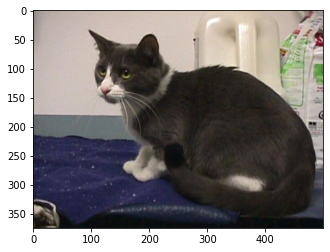

In [16]:
plt.imshow(cat4)

In [18]:
cat4.shape

(375, 500, 3)

In [19]:
dog = cv2.imread('../data/CATS_DOGS/train/DOG/2.jpg')

In [20]:
dog = cv2.cvtColor(dog,cv2.COLOR_BGR2RGB)

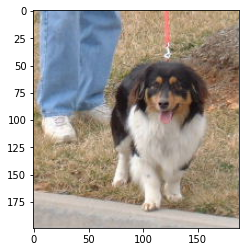

In [21]:
plt.imshow(dog)

In [22]:
dog.shape

(199, 188, 3)

In [23]:
from keras.preprocessing.image import ImageDataGenerator

In [25]:
image_gen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    rescale=1/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

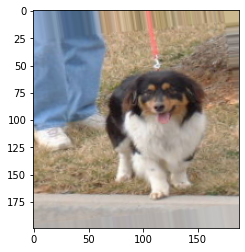

In [32]:
plt.imshow(image_gen.random_transform(dog))

In [33]:
image_gen.flow_from_directory('../data/CATS_DOGS/train')

Found 18743 images belonging to 2 classes.


In [37]:
input_shape = (150,150,3)

In [42]:
from keras.layers import Activation,Dropout,Dense,Flatten,Conv2D,MaxPooling2D

In [43]:
from keras.models import Sequential

In [44]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5)) # drop 50% neurons

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [46]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)            

In [48]:
batch_size = 16

training_image_gen = image_gen.flow_from_directory('../data/CATS_DOGS/train',target_size=input_shape[:2],batch_size=batch_size,class_mode='binary')

Found 18743 images belonging to 2 classes.


In [49]:
test_image_gen = image_gen.flow_from_directory('../data/CATS_DOGS/test',target_size=input_shape[:2],batch_size=batch_size,class_mode='binary')

Found 6251 images belonging to 2 classes.


In [50]:
training_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [54]:
results = model.fit_generator(training_image_gen,epochs=1,steps_per_epoch=150,validation_data=test_image_gen,validation_steps=12) # 150 * 16 (batch-size) not 1 batch 18743 images

d:\python\python-opencv-and-deep-learning\env\lib\site-packages\keras\engine\training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
 83/150 [===============>..............] - ETA: 45s - loss: 0.6953 - accuracy: 0.5181d:\python\python-opencv-and-deep-learning\env\lib\site-packages\PIL\TiffImagePlugin.py:793: UserWarning: Truncated File Read
  warnings.warn(str(msg))
150/150 [==============================] - 104s 691ms/step - loss: 0.6936 - accuracy: 0.5167 - val_loss: 0.6922 - val_accuracy: 0.4740


In [57]:
results.history['accuracy']

[0.5166666507720947]

In [58]:
from keras.models import load_model

In [61]:
new_model = load_model('cat_dog_100epochs.h5')

In [63]:
dog_file = '../data/CATS_DOGS/test/DOG/10005.jpg'

In [64]:
from keras.preprocessing import image

In [65]:
dog_img = image.load_img(dog_file,target_size=(150,150))

In [66]:
dog_img = image.img_to_array(dog_img)

In [67]:
dog_img.shape

(150, 150, 3)

In [68]:
import numpy as np
dog_img = np.expand_dims(dog_img,axis=0)

In [69]:
dog_img.shape

(1, 150, 150, 3)

In [70]:
dog_img = dog_img / 255

In [71]:
model.predict_classes(dog_img) # 0 - CAT 1 - DOG -> training_image_gen.class_indices

d:\python\python-opencv-and-deep-learning\env\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[0]])

In [72]:
model.predict(dog_img)

array([[0.47351104]], dtype=float32)